# DS PROJECT - Predicting the outcome of driving exams in Estonia

### Reading data and importing libraries 

In [1]:
import pandas as pd

data = pd.read_csv("cleanedData.csv")

data.head()

SEISUND  KESTUS  VARASEMAID_KATSEID  BYROO_Haapsalu  BYROO_Jõgeva  \
0        1    50.0                   0               1             0   
1        0    24.0                   0               0             1   
2        0    24.0                   0               0             0   
3        0    48.0                   0               0             0   
4        1    51.0                   0               1             0   

   BYROO_Jõhvi  BYROO_Kuressaare  BYROO_Kärdla  BYROO_Narva  BYROO_Paide  ...  \
0            0                 0             0            0            0  ...   
1            0                 0             0            0            0  ...   
2            0                 0             0            0            0  ...   
3            0                 0             0            0            0  ...   
4            0                 0             0            0            0  ...   

   KUU_3  KUU_4  KUU_5  KUU_6  KUU_7  KUU_8  KUU_9  KUU_10  KUU_11  KUU_12  
0      0      0      0      0      0      0      0       0       0       0  
1      0      0      0      0      0      0      0       0       0       0  
2      0      0      0      0      0      0      0       0       0       0  
3      0      0      0      0      0      0      0       0       0       0  
4      0      0      0      0      0      0      0       0       0       0  

[5 rows x 256 columns]

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

## Train-test split

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop(["SEISUND"], axis=1)
y = data["SEISUND"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



## Trying different models 

### DecisionTree

In [4]:
#Hold-out validation
from sklearn.tree import DecisionTreeClassifier

models_df = pd.DataFrame(columns=['model','params','accuracy','test_accuracy'])

criterions=['gini','entropy']
max_depths=[None,1,2,3,4,5,6,7,8,9,10]
random_state = 0

for crit in criterions:
    for max_depth in max_depths:
        model = DecisionTreeClassifier(criterion = crit, max_depth = max_depth, random_state = random_state)
        model.fit(X_train_sub, y_train_sub)
        acc = accuracy_score(y_val, model.predict(X_val))
        params = model.get_params()
        #test
        acc_test = accuracy_score(y_test,model.predict(X_test))
        models_df.loc[len(models_df)] = pd.Series(["DecisionTree",params,acc,acc_test], index=['model', 'params', 'accuracy','test_accuracy'])

In [5]:
models_df.sort_values(by=['accuracy','test_accuracy'], ascending=False)

model                                             params  accuracy  \
19  DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.893824   
20  DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.893724   
10  DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.893525   
21  DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.892927   
8   DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.892677   
9   DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.892627   
18  DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.892627   
7   DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.892179   
6   DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.891481   
5   DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.889836   
17  DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.888141   
16  DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.886995   
4   DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.886845   
15  DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.884951   
3   DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.884652   
14  DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.883107   
1   DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.882159   
2   DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.882159   
12  DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.879218   
13  DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.879218   
0   DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.859329   
11  DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...   0.85559   

   test_accuracy  
19      0.892766  
20      0.894042  
10      0.893922  
21      0.893484  
8       0.892846  
9       0.892806  
18      0.892527  
7       0.892128  
6        0.89133  
5       0.890094  
17      0.889735  
16      0.887901  
4       0.889815  
15      0.887263  
3       0.887781  
14      0.884192  
1       0.883714  
2       0.883714  
12      0.880842  
13      0.880842  
0       0.857872  
11      0.855998

In [6]:
models_df.loc[10]['params'],#best decisiontree with hold-out validation

({'ccp_alpha': 0.0,
  'class_weight': None,
  'criterion': 'gini',
  'max_depth': 10,
  'max_features': None,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'random_state': 0,
  'splitter': 'best'},)

In [7]:
#K-fold cross validation
from sklearn.model_selection import cross_val_score
import numpy as np

results_df = pd.DataFrame(columns=['model', 'params', 'accuracy'])

for crit in criterions:
    for max_depth in max_depths:
        model = DecisionTreeClassifier(criterion = crit, max_depth = max_depth)
        scores = cross_val_score(model, X_train, y_train, cv=5)
        params = model.get_params()
        results_df.loc[len(results_df)] = pd.Series(["DecisionTree",params,np.mean(scores)], index=['model', 'params', 'accuracy'])

In [8]:
results_df.sort_values('accuracy', ascending=False)

model                                             params  accuracy
10  DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.896143
9   DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.895903
21  DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.895345
20  DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.895215
8   DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.895185
19  DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.895066
7   DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.894936
18  DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.894218
6   DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.892783
5   DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.891457
17  DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.890888
16  DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.889542
4   DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.889273
3   DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.888037
15  DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.887957
14  DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.885594
2   DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.885305
1   DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.885305
13  DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.881836
12  DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.881836
0   DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.859603
11  DecisionTree  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.859453

In [9]:
results_df.loc[10].params #K-fold best

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [10]:
#Grid-search
from sklearn.model_selection import GridSearchCV
parameters = {"criterion": criterions,
              "max_depth": max_depths}

model = DecisionTreeClassifier()
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [11]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [12]:
acc = accuracy_score(y_test, clf.predict(X_test))
acc

0.8955575051842399

### Random Forest Classifier 

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

# Hold-out validation
models_df_rf = pd.DataFrame(columns=['model', 'params', 'accuracy', 'test_accuracy'])

for crit in criterions:
    for max_depth in max_depths:
        model_rf = RandomForestClassifier(criterion=crit, max_depth=max_depth, random_state=random_state)
        model_rf.fit(X_train_sub, y_train_sub)
        acc_rf = accuracy_score(y_val, model_rf.predict(X_val))
        params_rf = model_rf.get_params()
       # Test
        acc_test_rf = accuracy_score(y_test, model_rf.predict(X_test))
        models_df_rf.loc[len(models_df_rf)] = pd.Series(["RandomForest", params_rf, acc_rf, acc_test_rf], index=['model', 'params', 'accuracy', 'test_accuracy'])

In [14]:
models_df_rf.sort_values('accuracy', ascending=False)

model                                             params  accuracy  \
11  RandomForest  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  0.894073   
0   RandomForest  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  0.891481   
10  RandomForest  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  0.883705   
21  RandomForest  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  0.883406   
20  RandomForest  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  0.883156   
9   RandomForest  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  0.882658   
19  RandomForest  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  0.880066   
8   RandomForest  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  0.878969   
18  RandomForest  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...   0.87882   
7   RandomForest  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  0.877773   
6   RandomForest  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  0.870645   
17  RandomForest  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  0.864065   
5   RandomForest  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  0.854344   
16  RandomForest  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...   0.84926   
4   RandomForest  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  0.833408   
15  RandomForest  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  0.831913   
3   RandomForest  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...   0.80968   
14  RandomForest  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  0.807088   
2   RandomForest  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...    0.8032   
13  RandomForest  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...   0.79996   
1   RandomForest  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  0.561089   
12  RandomForest  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  0.561089   

   test_accuracy  
11      0.890812  
0       0.890453  
10       0.88479  
21       0.88475  
20      0.883714  
9       0.883634  
19      0.880683  
8       0.879247  
18      0.878609  
7       0.878808  
6       0.870992  
17      0.864332  
5       0.854682  
16      0.850215  
4       0.833905  
15      0.832509  
3       0.809021  
14      0.806907  
2       0.802839  
13      0.800088  
1       0.558263  
12      0.558263

In [17]:
models_df_rf.loc[11]['params'] # best Hold-out rf

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [18]:
# K-fold cross-validation
results_df_rf = pd.DataFrame(columns=['model', 'params', 'accuracy'])

for crit in criterions:
    for max_depth in max_depths:
        model_rf = RandomForestClassifier(criterion=crit, max_depth=max_depth)
        scores_rf = cross_val_score(model_rf, X_train, y_train, cv=5)
        params_rf = model_rf.get_params()
        results_df_rf.loc[len(results_df_rf)] = pd.Series(["RandomForest", params_rf, np.mean(scores_rf)], index=['model', 'params', 'accuracy'])

KeyboardInterrupt: 

In [ ]:
results_df_rf.sort_values('accuracy', ascending=False)

In [ ]:
results_df_rf.loc[10]['params'] # best K-fold cross-validation rf

In [ ]:
# Grid-search
parameters_rf = {"criterion": criterions, "max_depth": max_depths}

model_rf = RandomForestClassifier()
clf_rf = GridSearchCV(model_rf, parameters_rf)
clf_rf.fit(X_train, y_train)

# Get best parameters
best_params_rf = clf_rf.best_params_

# Evaluate on test set
acc_rf = accuracy_score(y_test, clf_rf.predict(X_test))

print("Random Forest - Best Parameters:", best_params_rf)
print("Random Forest - Accuracy on Test Set:", acc_rf)

## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Hold-out validation
#models_df_svm = pd.DataFrame(columns=['model', 'params', 'accuracy', 'test_accuracy'])

# Try different kernel options (linear, polynomial, radial basis function)
#kernels = ['linear', 'poly', 'rbf']
#random_state = 0

#for kernel in kernels:
    #model_svm = SVC(kernel=kernel, random_state=random_state)
    #model_svm.fit(X_train_sub, y_train_sub)
    
    #acc_svm = accuracy_score(y_val, model_svm.predict(X_val))
    #params_svm = model_svm.get_params()
    
    # Test
    #acc_test_svm = accuracy_score(y_test, model_svm.predict(X_test))
    
    #models_df_svm.loc[len(models_df_svm)] = pd.Series(["SVM", params_svm, acc_svm, acc_test_svm], index=['model', 'params', 'accuracy', 'test_accuracy'])


In [ ]:
#models_df_svm.sort_values('accuracy', ascending=False)

In [ ]:
# K-fold cross-validation
#results_df_svm = pd.DataFrame(columns=['model', 'params', 'accuracy'])

#for kernel in kernels:
    #model_svm = SVC(kernel=kernel)
    #scores_svm = cross_val_score(model_svm, X_train, y_train, cv=5)
    #params_svm = model_svm.get_params()
    #results_df_svm.loc[len(results_df_svm)] = pd.Series(["SVM", params_svm, np.mean(scores_svm)], index=['model', 'params', 'accuracy'])

In [ ]:
#results_df_svm.sort_values('accuracy', ascending=False)

## Best parameters and model

In [19]:
best_params = {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10,
               'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0,
               'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0,
               'random_state': 0, 'splitter': 'best'}

model_dt = DecisionTreeClassifier(**best_params)
model_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_dt.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

Accuracy on the test set: 0.8953979901100654


In [20]:
# feature importance 
feature_importance = model_dt.feature_importances_

# Create pairs of feature names and their importance scores
feature_importance_pairs = list(zip(X.columns, feature_importance))

# Sort based on importance scores (descending order)
sorted_feature_importance = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Print the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

KESTUS: 0.9199351965791741
KATEGOORIA_B: 0.011881206707121192
AASTA_2021: 0.006368536235180177
EKSAMINEERIJA_a1d9e404aeec83d1: 0.004612700106984849
VARASEMAID_KATSEID: 0.0037206419747495977
KATEGOORIA_C: 0.0033071247996649842
EKSAMINEERIJA_ae264be409f2ca9f: 0.003265350152390081
KATEGOORIA_CE: 0.00321019704014205
EKSAMINEERIJA_b7576201d47b425b: 0.0029445665773170874
KATEGOORIA_A: 0.0026802362529509344
EKSAMINEERIJA_b6982cbd7a6000e4: 0.0026280965018419147
EKSAMINEERIJA_ff4d9b9b519322e3: 0.0026045299471455933
EKSAMINEERIJA_eb13365f3504e035: 0.0025125510062250765
ERITINGIMUSED_96: 0.0023940649334062555
EKSAMINEERIJA_844452b4e4bac2ef: 0.0021183614606557857
EKSAMINEERIJA_4ee4a4702131dac3: 0.001978230588243712
EKSAMINEERIJA_a90a6cc35a006268: 0.0012459697056195905
KATEGOORIA_A2: 0.001057347278260669
EKSAMINEERIJA_4b9e369e12d8f969: 0.0008848155215942508
EKSAMINEERIJA_400e86ed874ccd07: 0.0008593704634597873
EKSAMINEERIJA_d15d81b55baf64ed: 0.0008317081578692579
BYROO_Kuressaare: 0.000828254222383

## Plotting tree 

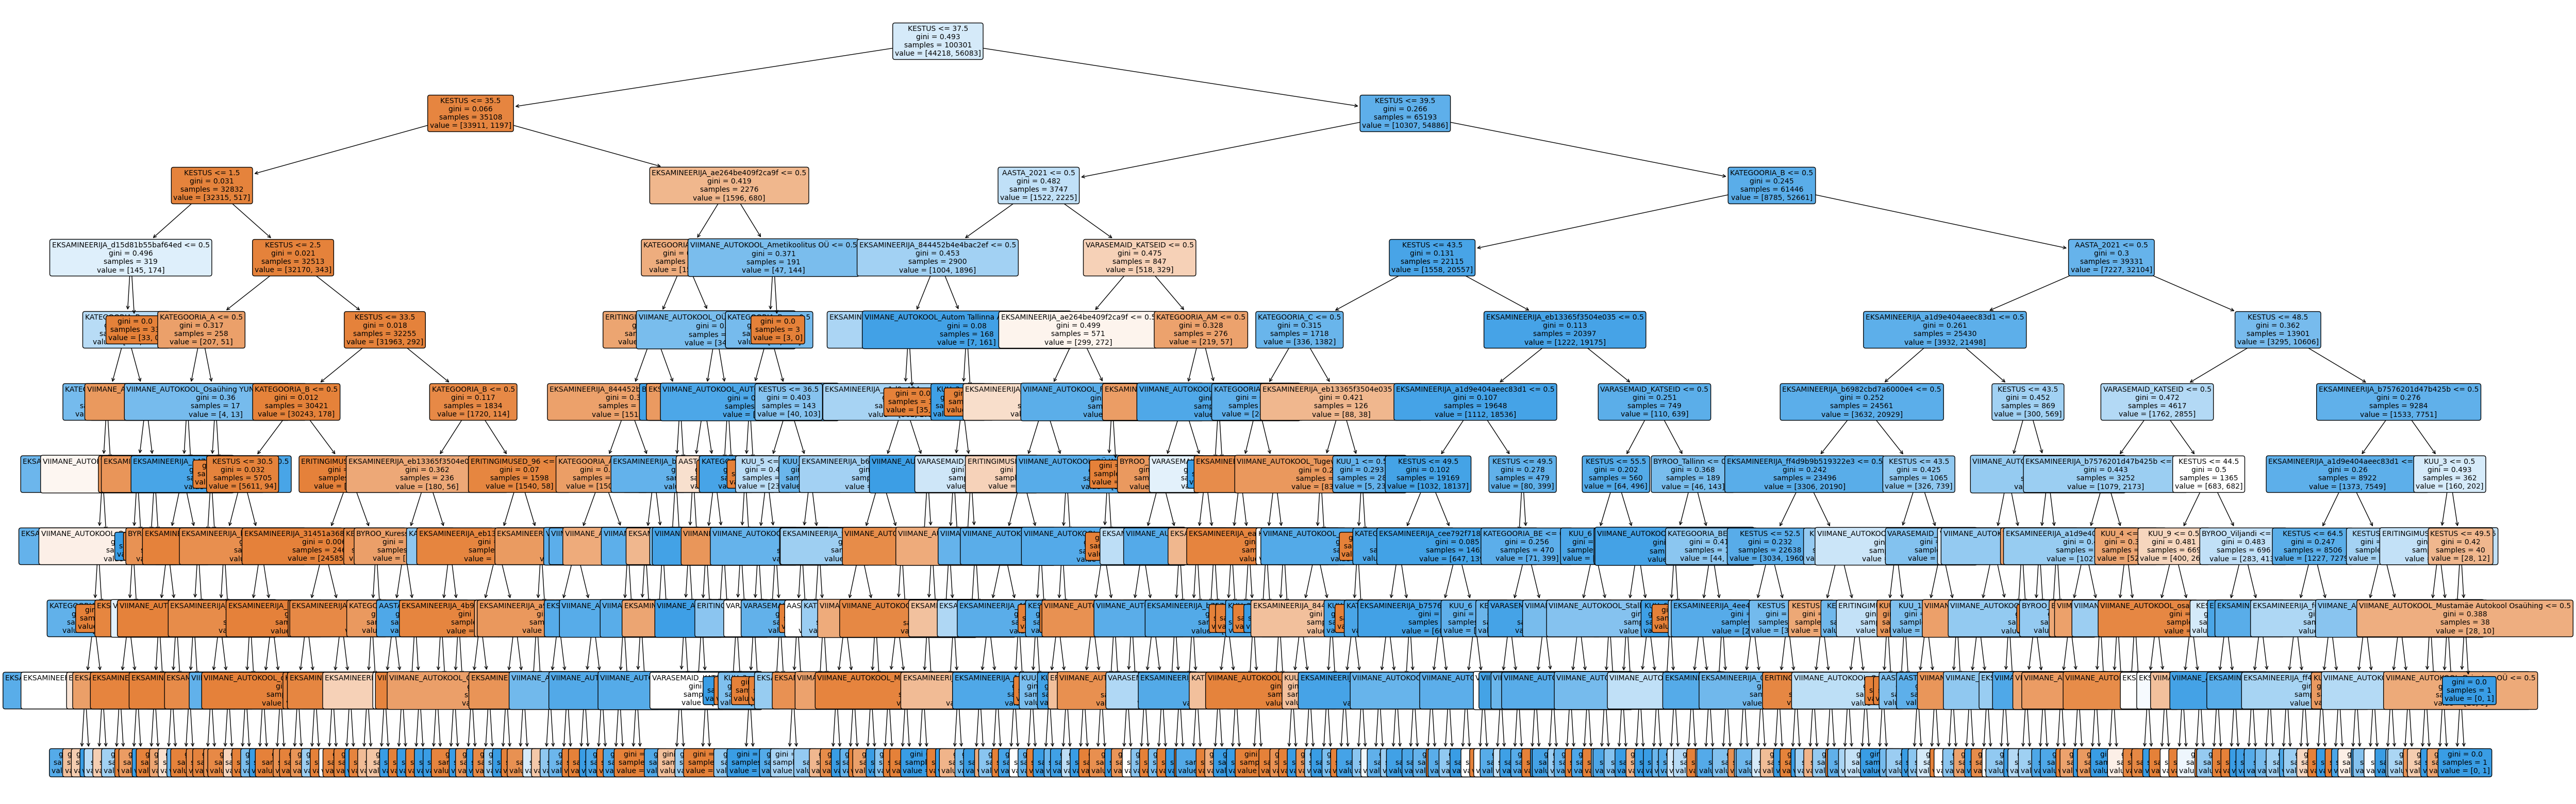

In [21]:
plt.figure(figsize=(60, 20))
plot_tree(model_dt, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.show()